### Importación de datos



In [34]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [45]:

nombres  = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
frames   = [tienda, tienda2, tienda3, tienda4]


for f in frames:
    f["Precio"] = pd.to_numeric(f["Precio"], errors="coerce")
    f["Calificación"] = pd.to_numeric(f["Calificación"], errors="coerce")
    f["Costo de envío"] = pd.to_numeric(f["Costo de envío"], errors="coerce")

#1. Análisis de facturación



🏪 Ingresos totales por tienda
→ Tienda 1: $1,150,880,400
→ Tienda 2: $1,116,343,500
→ Tienda 3: $1,098,019,600
→ Tienda 4: $1,038,375,700


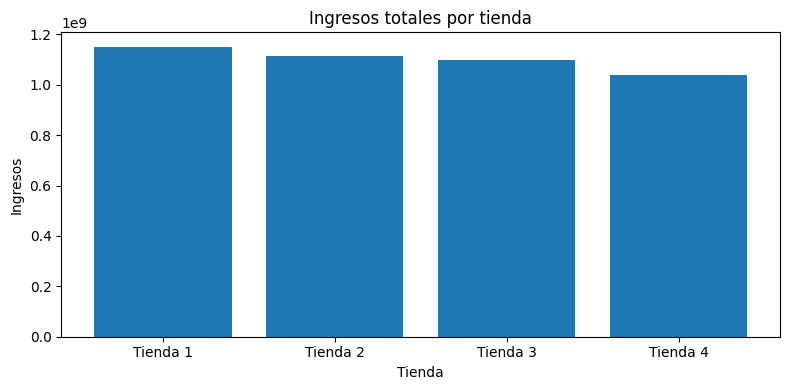

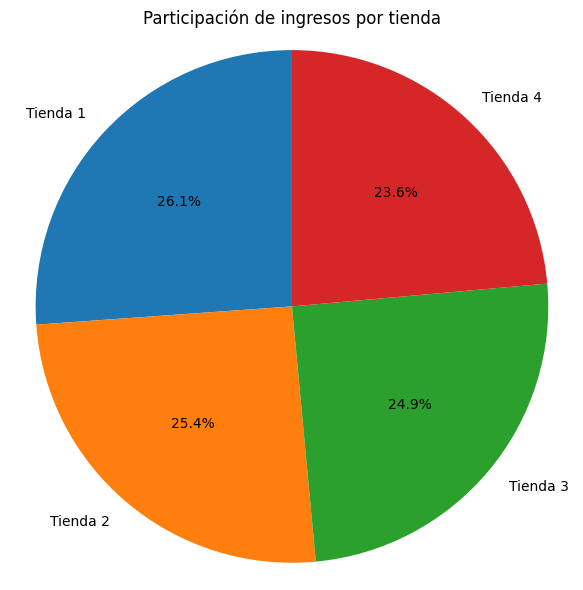

In [46]:
import matplotlib.pyplot as plt

ingresos = [float(f["Precio"].sum()) for f in frames]

print("🏪 Ingresos totales por tienda")
for n, tot in zip(nombres, ingresos):
    print(f"→ {n}: ${tot:,.0f}")

# Barras
plt.figure(figsize=(8,4))
plt.bar(nombres, ingresos)
plt.title("Ingresos totales por tienda")
plt.ylabel("Ingresos")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()

# Pastel (participación de ingresos)
plt.figure(figsize=(6,6))
plt.pie(ingresos, labels=nombres, autopct="%1.1f%%", startangle=90)
plt.title("Participación de ingresos por tienda")
plt.axis("equal")
plt.tight_layout()
plt.show()



# 2. Ventas por categoría

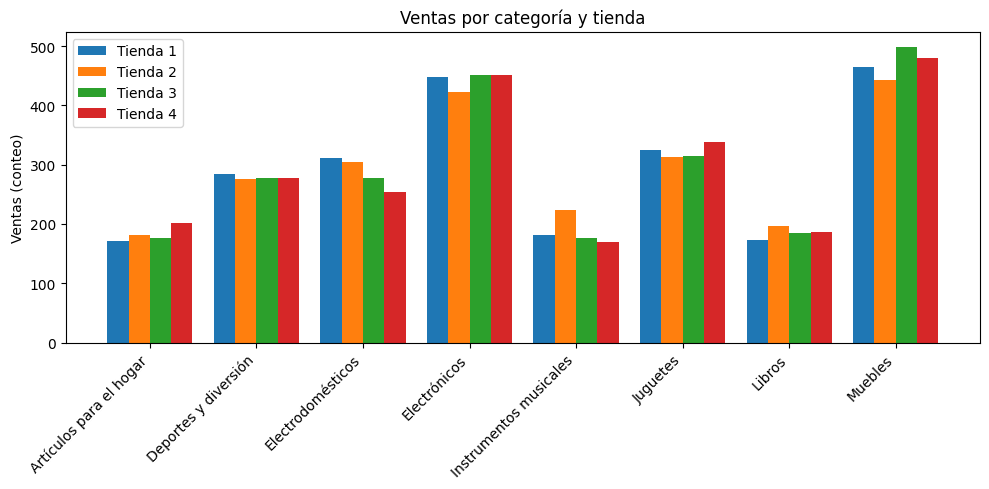

In [47]:
import numpy as np
# value_counts por tienda
v1 = tienda["Categoría del Producto"].value_counts()
v2 = tienda2["Categoría del Producto"].value_counts()
v3 = tienda3["Categoría del Producto"].value_counts()
v4 = tienda4["Categoría del Producto"].value_counts()

# unimos categorías presentes en cualquiera
cats = sorted(set(v1.index) | set(v2.index) | set(v3.index) | set(v4.index))

ventas_cat = (
    pd.DataFrame({
        "Tienda 1": v1, "Tienda 2": v2, "Tienda 3": v3, "Tienda 4": v4
    })
    .reindex(cats)
    .fillna(0)
    .astype(int)
)

ventas_cat  # tabla

# gráfico de barras agrupadas
x = np.arange(len(cats))
w = 0.2
plt.figure(figsize=(10,5))
plt.bar(x-1.5*w, ventas_cat["Tienda 1"].values, width=w, label="Tienda 1")
plt.bar(x-0.5*w, ventas_cat["Tienda 2"].values, width=w, label="Tienda 2")
plt.bar(x+0.5*w, ventas_cat["Tienda 3"].values, width=w, label="Tienda 3")
plt.bar(x+1.5*w, ventas_cat["Tienda 4"].values, width=w, label="Tienda 4")
plt.xticks(x, cats, rotation=45, ha="right")
plt.ylabel("Ventas (conteo)")
plt.title("Ventas por categoría y tienda")
plt.legend()
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


⭐ Calificación promedio:
→ Tienda 1: 3.98
→ Tienda 2: 4.04
→ Tienda 3: 4.05
→ Tienda 4: 4.00


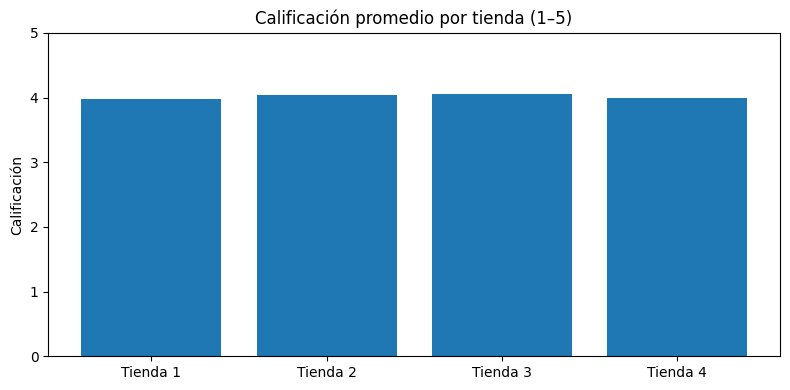

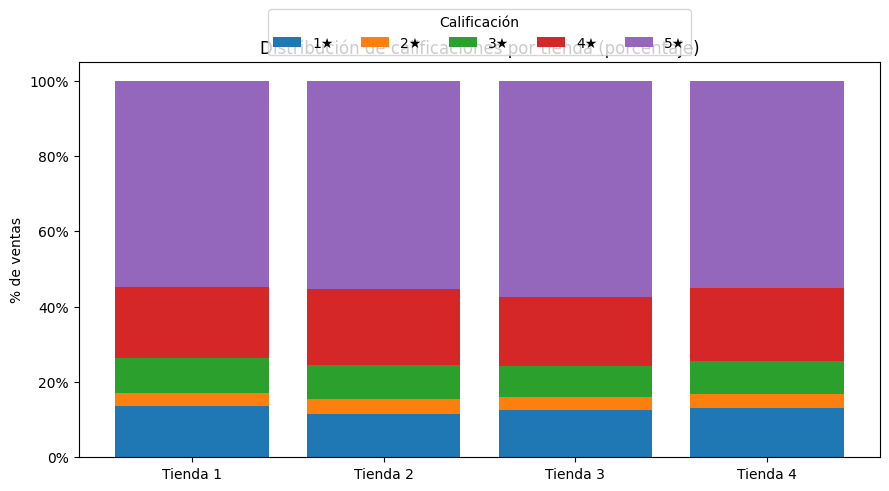

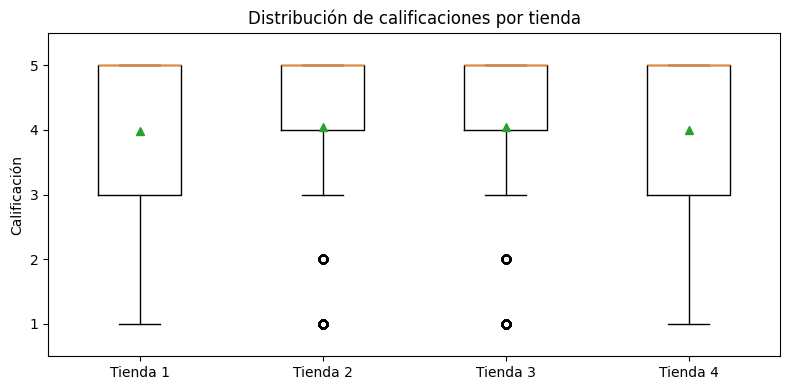

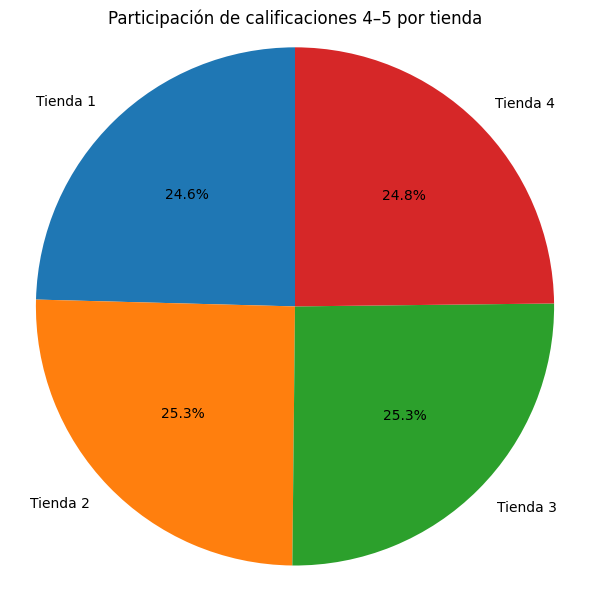

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

# asegurar numérico
for f in frames:
    f["Calificación"] = pd.to_numeric(f["Calificación"], errors="coerce")

califs = [f["Calificación"].mean() for f in frames]

print("⭐ Calificación promedio:")
for n, c in zip(nombres, califs):
    print(f"→ {n}: {c:.2f}")

# 1) Barras (promedio)
plt.figure(figsize=(8,4))
plt.bar(nombres, califs)
plt.ylim(0,5)
plt.title("Calificación promedio por tienda (1–5)")
plt.ylabel("Calificación")
plt.tight_layout()
plt.show()

# 2) Barras apiladas: distribución 1–5 por tienda (100% stacked)
niveles = [1,2,3,4,5]
dist = np.array([
    f["Calificación"].value_counts().reindex(niveles, fill_value=0).values
    for f in frames
])
dist_pct = dist / dist.sum(axis=1, keepdims=True)  # porcentajes por tienda

bottom = np.zeros(len(frames))
plt.figure(figsize=(9,5))
for j, lvl in enumerate(niveles):
    plt.bar(nombres, dist_pct[:, j], bottom=bottom, label=f"{lvl}★")
    bottom += dist_pct[:, j]
plt.title("Distribución de calificaciones por tienda (porcentaje)")
plt.ylabel("% de ventas")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.legend(title="Calificación", ncol=5, loc="upper center", bbox_to_anchor=(0.5, 1.15))
plt.tight_layout()
plt.show()

# 3) Boxplot (distribución de calificaciones)  ← cambio clave: tick_labels=
plt.figure(figsize=(8,4))
plt.boxplot([f["Calificación"].dropna() for f in frames],
            tick_labels=nombres, showmeans=True)
plt.ylim(0.5,5.5)
plt.title("Distribución de calificaciones por tienda")
plt.ylabel("Calificación")
plt.tight_layout()
plt.show()

# (opcional) Pastel: % de calificaciones 4–5 (clientes satisfechos)
satis = [(f["Calificación"]>=4).sum() for f in frames]
plt.figure(figsize=(6,6))
plt.pie(satis, labels=nombres, autopct="%1.1f%%", startangle=90)
plt.title("Participación de calificaciones 4–5 por tienda")
plt.axis("equal")
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos


🔼 Tienda 1 - Top 5 productos


,ventas
Producto,
Microondas,60
TV LED UHD 4K,60
Armario,60
Secadora de ropa,58
Mesa de noche,56


🔽 Tienda 1 - Bottom 5 productos


,ventas
Producto,
Ciencia de datos con Python,39
Pandereta,36
Olla de presión,35
Auriculares con micrófono,33
Celular ABXY,33


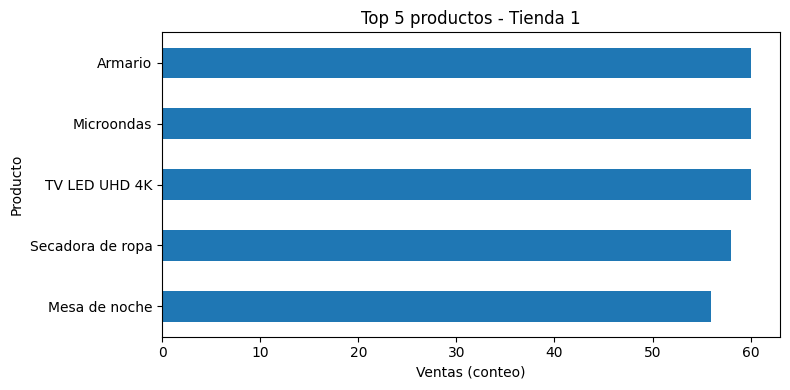

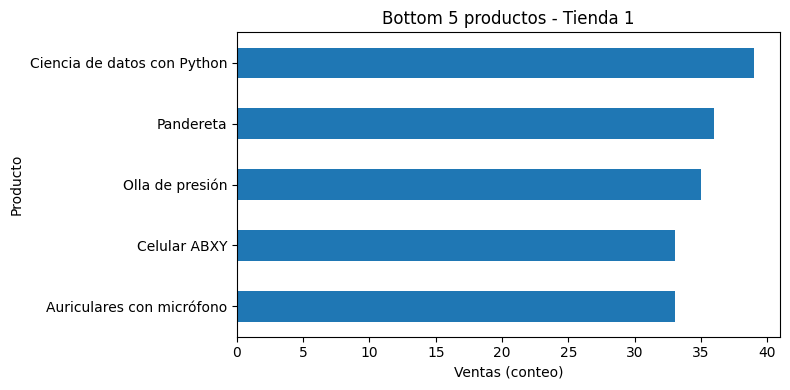


🔼 Tienda 2 - Top 5 productos


,ventas
Producto,
Iniciando en programación,65
Microondas,62
Batería,61
Guitarra acústica,58
Pandereta,58


🔽 Tienda 2 - Bottom 5 productos


,ventas
Producto,
Auriculares,37
Sillón,35
Mesa de comedor,34
Impresora,34
Juego de mesa,32


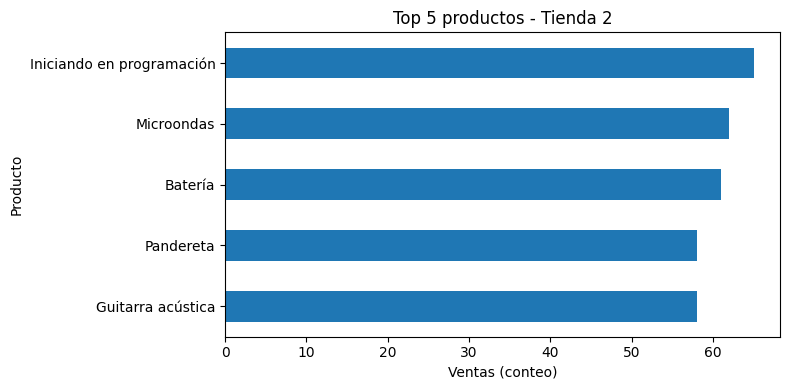

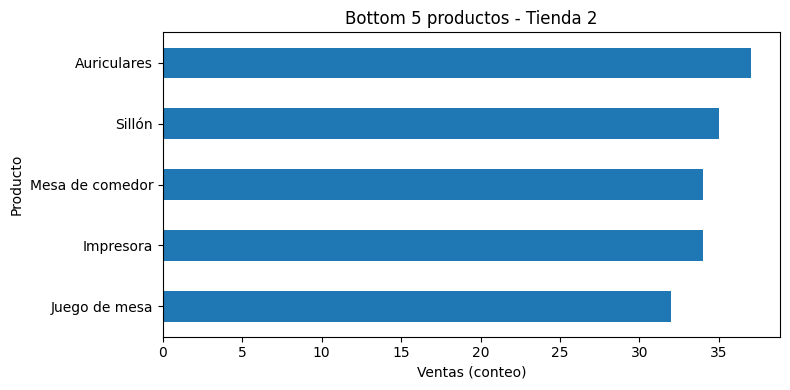


🔼 Tienda 3 - Top 5 productos


,ventas
Producto,
Kit de bancas,57
Mesa de comedor,56
Cama king,56
Set de ollas,55
Mesa de noche,55


🔽 Tienda 3 - Bottom 5 productos


,ventas
Producto,
Guitarra eléctrica,38
Set de vasos,36
Mochila,36
Microondas,36
Bloques de construcción,35


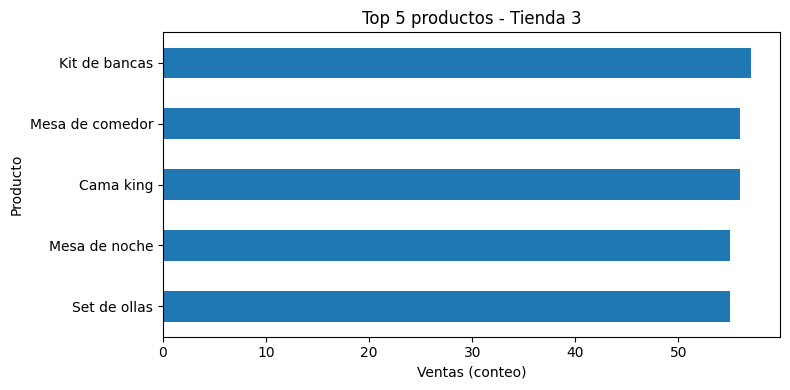

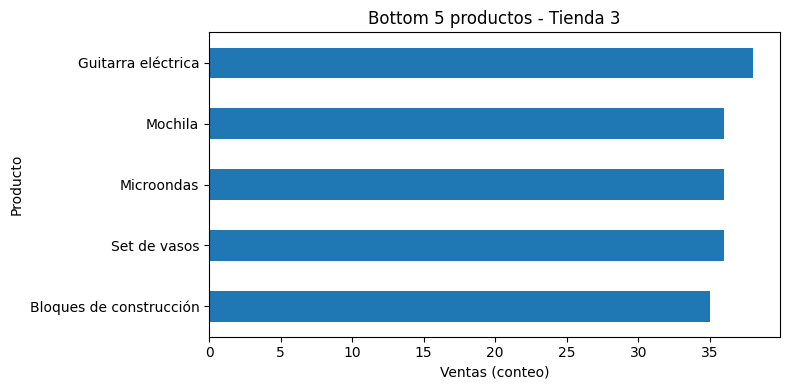


🔼 Tienda 4 - Top 5 productos


,ventas
Producto,
Cama box,62
Cubertería,59
Dashboards con Power BI,56
Cama king,56
Carrito de control remoto,55


🔽 Tienda 4 - Bottom 5 productos


,ventas
Producto,
Refrigerador,38
Ciencia de datos con Python,38
Guitarra acústica,37
Armario,34
Guitarra eléctrica,33


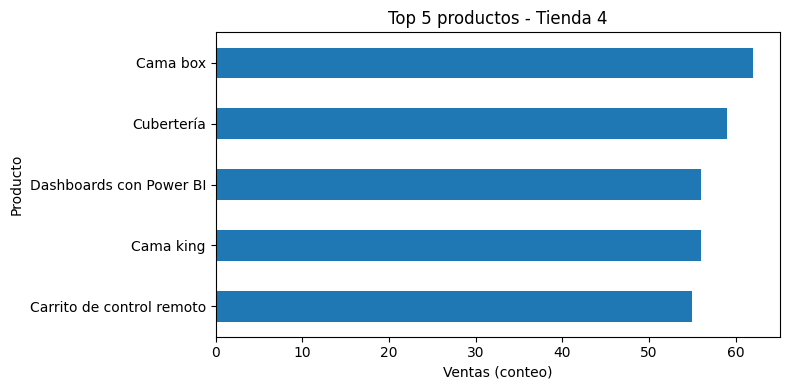

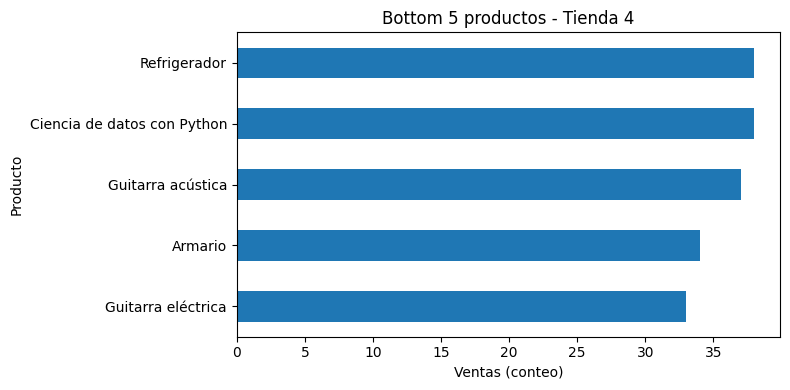

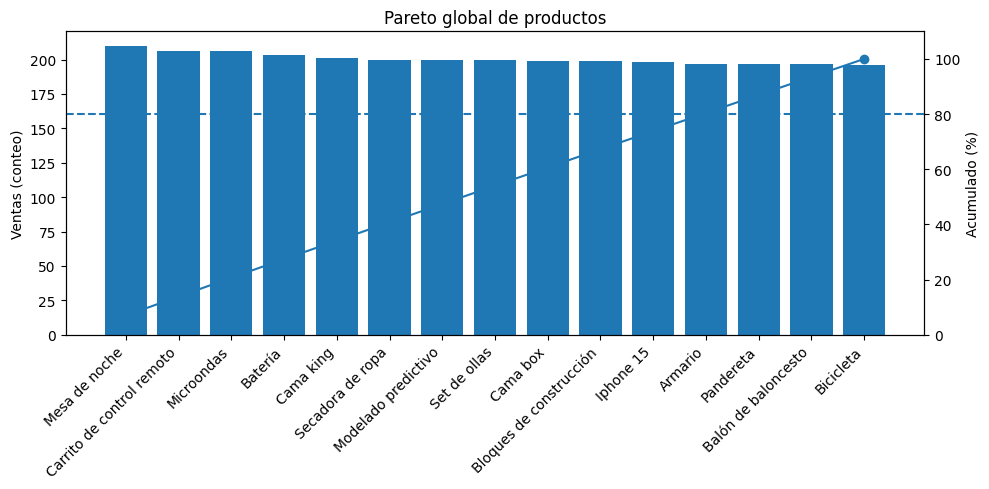

In [51]:
# función corregida (usa 'nombre' en prints)
def top_bottom(df_, nombre):
    vc = df_["Producto"].value_counts()
    top5 = vc.head(5); bottom5 = vc.tail(5)

    print(f"\n🔼 {nombre} - Top 5 productos")
    display(top5.to_frame("ventas"))

    print(f"🔽 {nombre} - Bottom 5 productos")
    display(bottom5.to_frame("ventas"))

    # Gráfico Top 5
    plt.figure(figsize=(8,4))
    top5.sort_values().plot(kind="barh")
    plt.title(f"Top 5 productos - {nombre}")
    plt.xlabel("Ventas (conteo)")
    plt.tight_layout(); plt.show()

    # Gráfico Bottom 5
    plt.figure(figsize=(8,4))
    bottom5.sort_values().plot(kind="barh")
    plt.title(f"Bottom 5 productos - {nombre}")
    plt.xlabel("Ventas (conteo)")
    plt.tight_layout(); plt.show()

for nombre, f in zip(nombres, frames):
    top_bottom(f, nombre)

# Pareto global (barras + línea acumulada)
todos = pd.concat([f["Producto"] for f in frames])
conteos = todos.value_counts()
topN = 15  # ajusta si quieres
top = conteos.head(topN)
cum = top.cumsum() / top.sum() * 100

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.bar(range(len(top)), top.values)
ax1.set_xticks(range(len(top)))
ax1.set_xticklabels(top.index, rotation=45, ha="right")
ax1.set_ylabel("Ventas (conteo)")
ax1.set_title("Pareto global de productos")

ax2 = ax1.twinx()
ax2.plot(range(len(top)), cum.values, marker="o")
ax2.set_ylabel("Acumulado (%)")
ax2.set_ylim(0, 110)
ax2.axhline(80, linestyle="--")  # regla 80/20 referencia
plt.tight_layout(); plt.show()


# 5. Envío promedio por tienda

📦 Envío promedio por tienda:
→ Tienda 1: $26,019
→ Tienda 2: $25,216
→ Tienda 3: $24,806
→ Tienda 4: $23,459


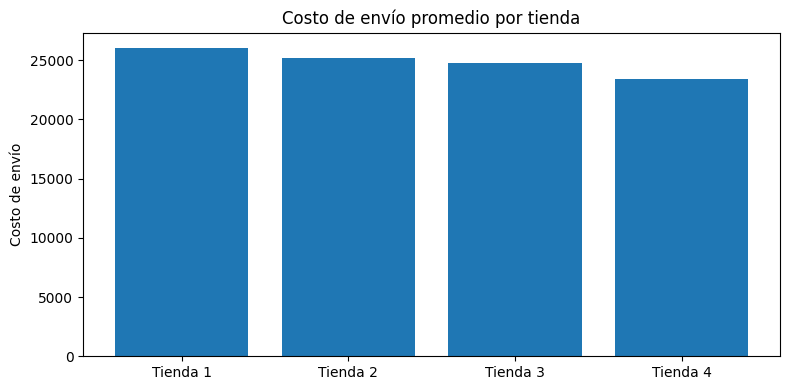

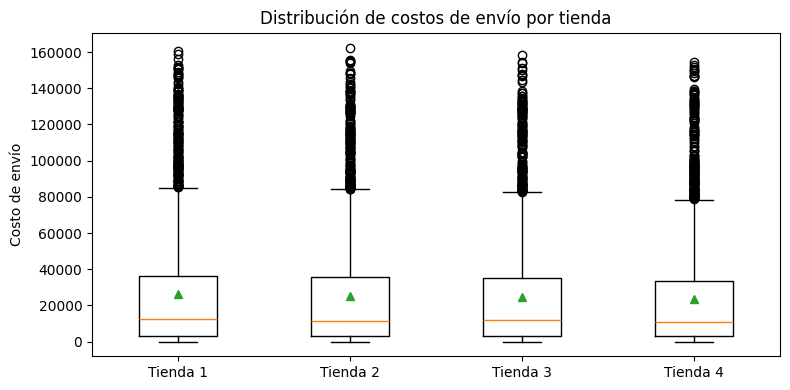

In [53]:
import matplotlib.pyplot as plt

# asegurar numérico
for f in frames:
    f["Costo de envío"] = pd.to_numeric(f["Costo de envío"], errors="coerce")

envios = [f["Costo de envío"].mean() for f in frames]

print("📦 Envío promedio por tienda:")
for n, e in zip(nombres, envios):
    print(f"→ {n}: ${e:,.0f}")

# Barras (promedio)
plt.figure(figsize=(8,4))
plt.bar(nombres, envios)
plt.title("Costo de envío promedio por tienda")
plt.ylabel("Costo de envío")
plt.tight_layout()
plt.show()

# Boxplot (distribución de costos)  ← cambio: tick_labels=
plt.figure(figsize=(8,4))
plt.boxplot([f["Costo de envío"].dropna() for f in frames],
            tick_labels=nombres, showmeans=True)
plt.title("Distribución de costos de envío por tienda")
plt.ylabel("Costo de envío")
plt.tight_layout()
plt.show()


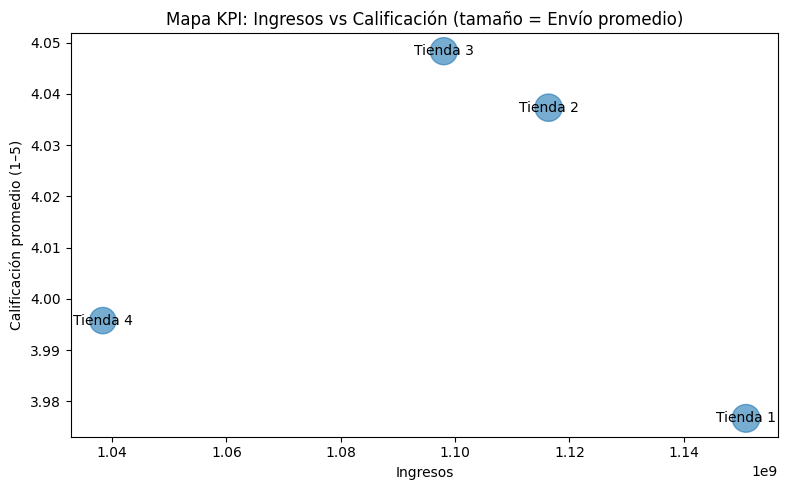

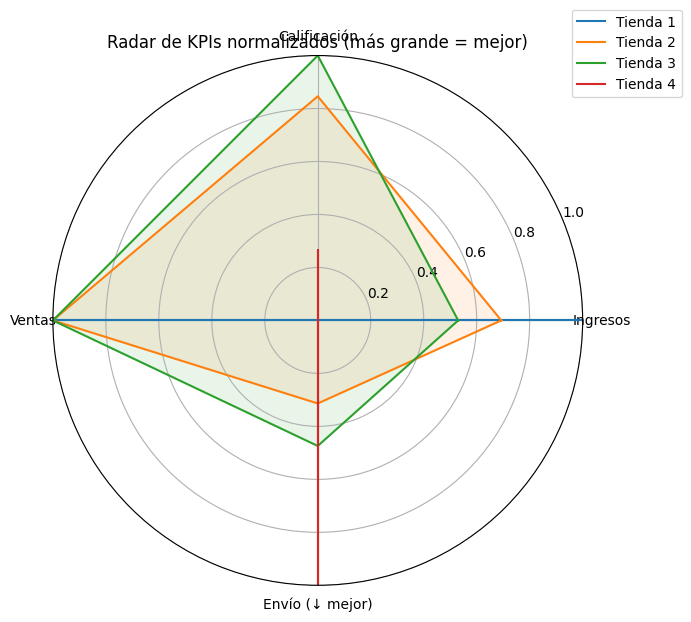

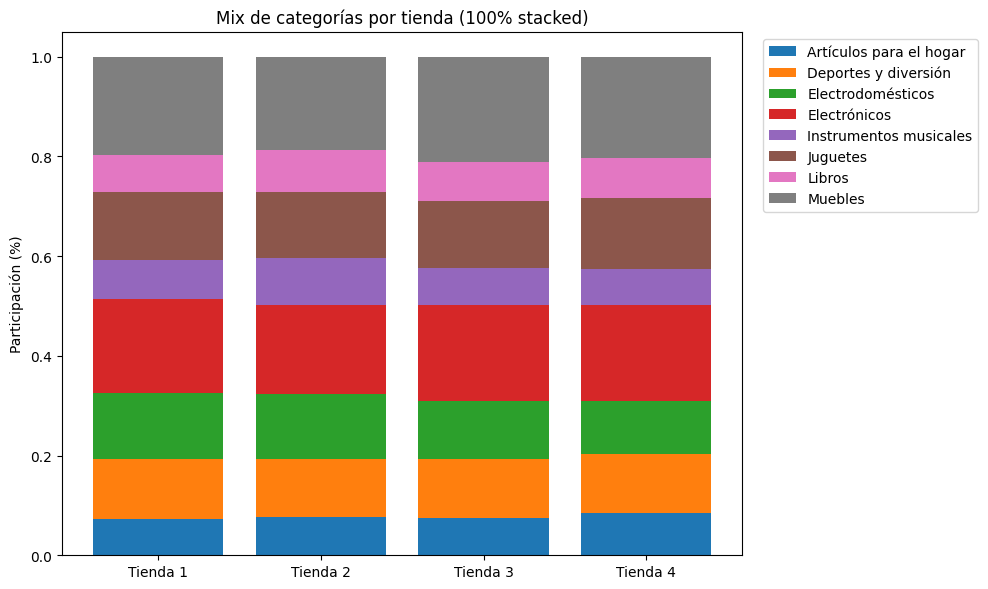

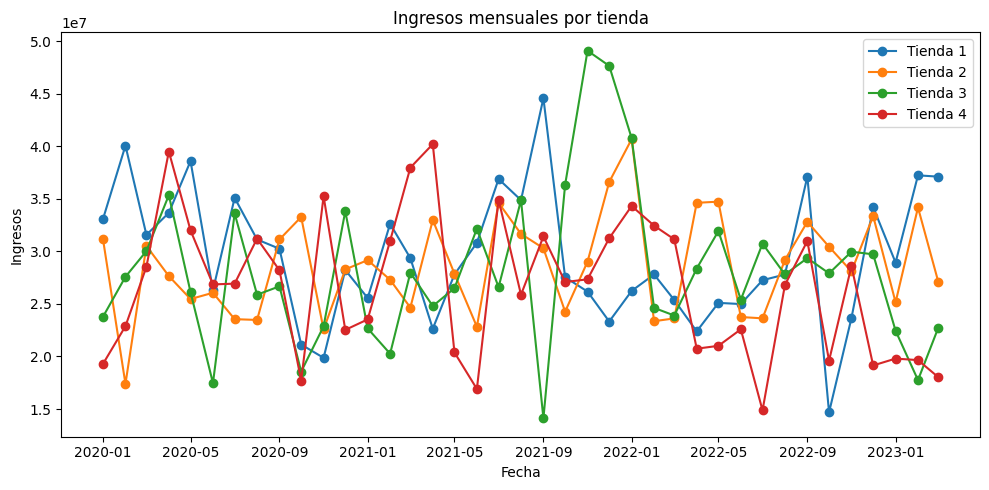

# Informe final — Alura Store

**Objetivo.** Analizar el desempeño de las 4 tiendas (ingresos, categorías y productos, calificación de clientes y costos de envío) para recomendar **cuál vender**.

## Resumen de métricas

| Tienda   |      Ingresos |   Calificación_prom |   Envío_prom |
|:---------|--------------:|--------------------:|-------------:|
| Tienda 1 | 1150880400.00 |                3.98 |     26018.61 |
| Tienda 2 | 1116343500.00 |                4.04 |     25216.24 |
| Tienda 3 | 1098019600.00 |                4.05 |     24805.68 |
| Tienda 4 | 1038375700.00 |                4.00 |     23459.46 |

## Hallazgos por tienda

### Tienda 1
- **Ingresos:** $1.150.880.400
- **Calificación promedio:** 3.98 / 5
- **Costo de envío promedio:** $26.019
- **Categorías más vendidas:** Muebles, Electrónicos, Juguetes
- **Categorías menos vendidas:** Instrumentos musicales, Libros, Artículos para el hogar
- **Productos Top:** Microondas, TV LED UHD 4K, Armario
- **Productos con menores ventas:** Olla de presión, Auriculares con micrófono, Celular ABXY

### Tienda 2
- **Ingresos:** $1.116.343.500
- **Calificación promedio:** 4.04 / 5
- **Costo de envío promedio:** $25.216
- **Categorías más vendidas:** Muebles, Electrónicos, Juguetes
- **Categorías menos vendidas:** Instrumentos musicales, Libros, Artículos para el hogar
- **Productos Top:** Iniciando en programación, Microondas, Batería
- **Productos con menores ventas:** Mesa de comedor, Impresora, Juego de mesa

### Tienda 3
- **Ingresos:** $1.098.019.600
- **Calificación promedio:** 4.05 / 5
- **Costo de envío promedio:** $24.806
- **Categorías más vendidas:** Muebles, Electrónicos, Juguetes
- **Categorías menos vendidas:** Libros, Instrumentos musicales, Artículos para el hogar
- **Productos Top:** Kit de bancas, Mesa de comedor, Cama king
- **Productos con menores ventas:** Mochila, Microondas, Bloques de construcción

### Tienda 4
- **Ingresos:** $1.038.375.700
- **Calificación promedio:** 4.00 / 5
- **Costo de envío promedio:** $23.459
- **Categorías más vendidas:** Muebles, Electrónicos, Juguetes
- **Categorías menos vendidas:** Artículos para el hogar, Libros, Instrumentos musicales
- **Productos Top:** Cama box, Cubertería, Dashboards con Power BI
- **Productos con menores ventas:** Guitarra acústica, Armario, Guitarra eléctrica

## Visualizaciones clave (debajo)

—
## Interpretación

- **Ingresos:** una tienda con facturación baja aporta menos al negocio.
- **Satisfacción (calificación):** promedios bajos indican mayor riesgo de devoluciones/quejas.
- **Logística (envío):** costos altos pueden reducir margen y conversión.

## Recomendación

**Propuesta:** vender **Tienda 4**.

**Justificación (datos):**
- Ingresos: $1.038.375.700 (entre los más bajos).
- Calificación promedio: 4.00 / 5 (relativamente inferior).
- Costo de envío promedio: $23.459 (comparativamente alto).
- La combinación de **bajos ingresos**, **menor satisfacción** y **coste logístico mayor** la posiciona como la **menos eficiente** dentro del portafolio.


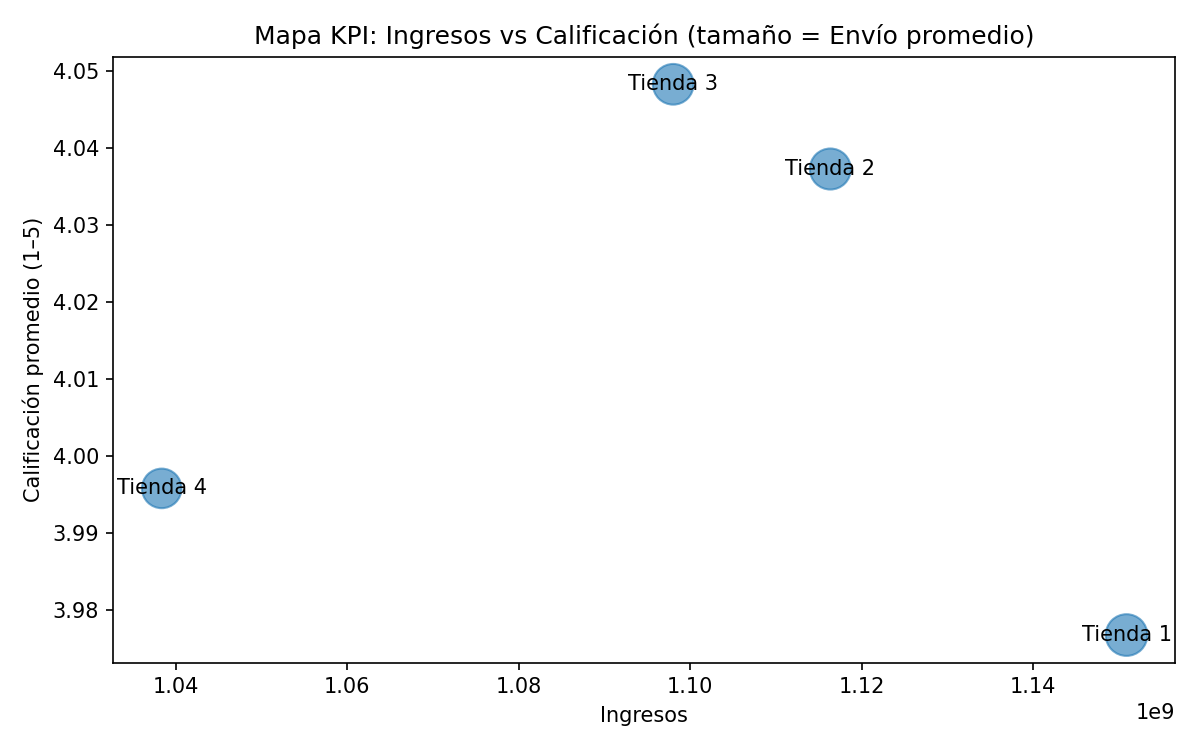

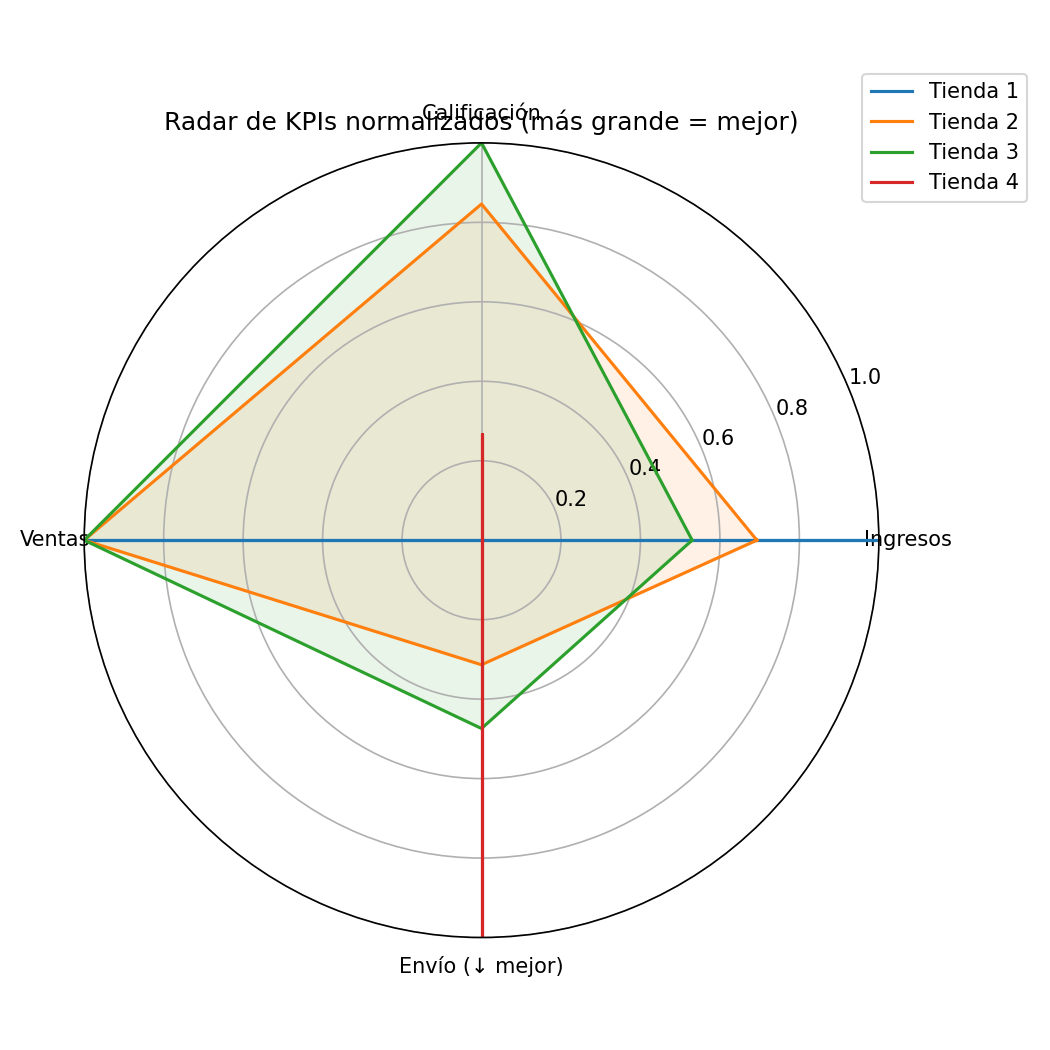

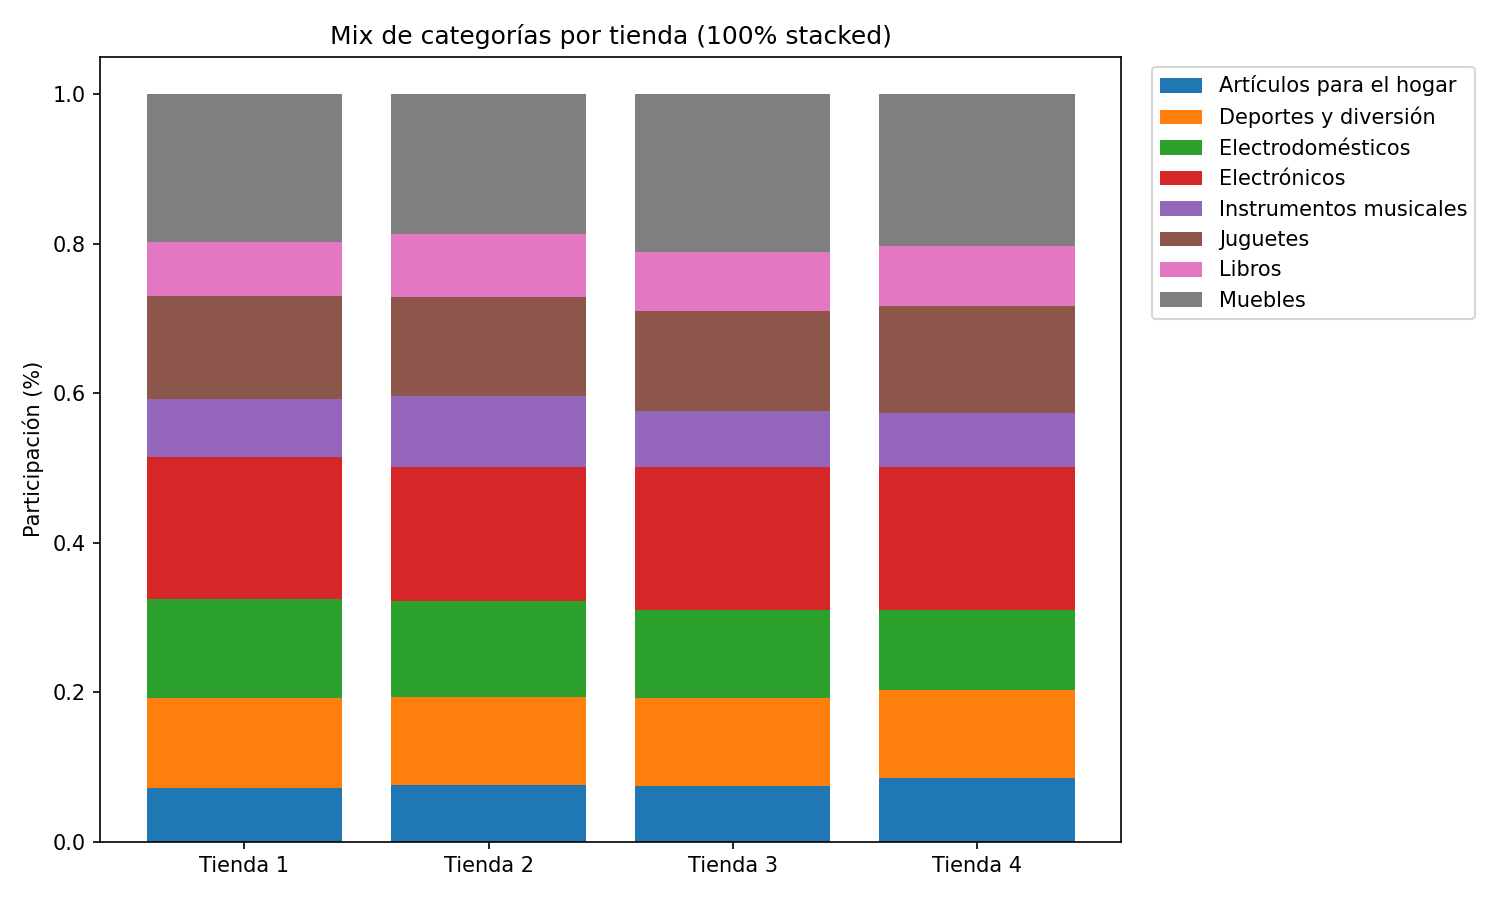

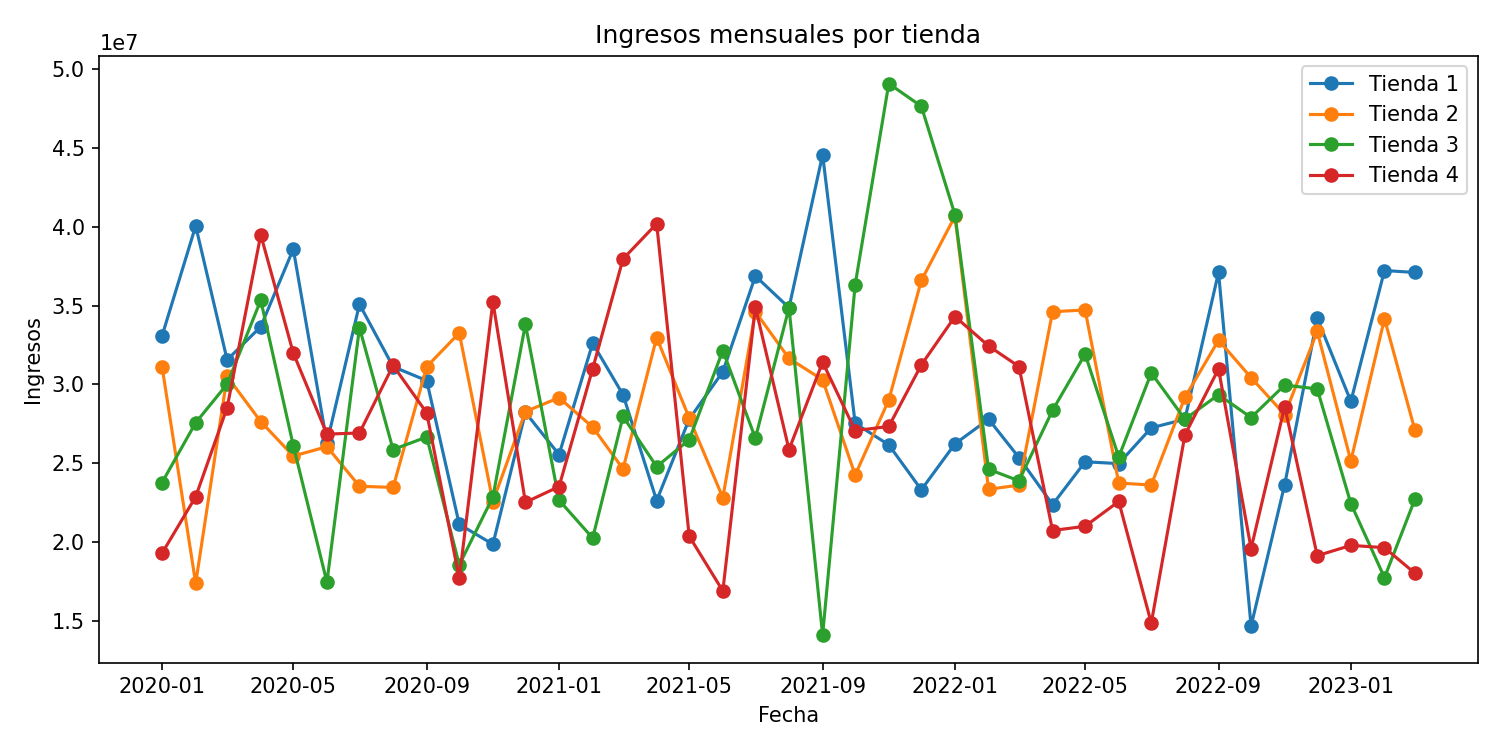

Archivo generado: informe_alura_store.md


In [62]:
# ========= Informe Final (Markdown + Gráficas) =========
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display, Image

# Asegúrate de tener estas listas:
nombres = ["Tienda 1","Tienda 2","Tienda 3","Tienda 4"]
frames  = [tienda, tienda2, tienda3, tienda4]

# ---------- 1) Asegurar tipos ----------
for f in frames:
    f["Precio"] = pd.to_numeric(f["Precio"], errors="coerce")
    f["Calificación"] = pd.to_numeric(f["Calificación"], errors="coerce")
    f["Costo de envío"] = pd.to_numeric(f["Costo de envío"], errors="coerce")

# ---------- 2) KPIs por tienda ----------
ingresos = [float(f["Precio"].sum()) for f in frames]
califs   = [float(f["Calificación"].mean()) for f in frames]
envios   = [float(f["Costo de envío"].mean()) for f in frames]

kpis = pd.DataFrame({
    "Tienda": nombres,
    "Ingresos": ingresos,
    "Calificación_prom": califs,
    "Envío_prom": envios
}).sort_values("Ingresos", ascending=False)

# ---------- 3) Top/Bottom categorías y productos ----------
def top_bottom_counts(s, top_n=3):
    vc = s.value_counts()
    return list(vc.head(top_n).index), list(vc.tail(top_n).index)

resumen = {}
for name, f in zip(nombres, frames):
    top_cat, bot_cat = top_bottom_counts(f["Categoría del Producto"])
    top_prod, bot_prod = top_bottom_counts(f["Producto"])
    resumen[name] = {"top_cat": top_cat, "bot_cat": bot_cat,
                     "top_prod": top_prod, "bot_prod": bot_prod}

# ---------- 4) Score de ineficiencia (venta) ----------
def minmax(x):
    x = np.array(x, dtype=float)
    if np.nanmax(x) == np.nanmin(x):
        return np.full_like(x, 0.5)
    return (x - np.nanmin(x)) / (np.nanmax(x) - np.nanmin(x))

bad_ing = 1 - minmax(ingresos)   # más bajo = peor
bad_cal = 1 - minmax(califs)     # más bajo = peor
bad_env =      minmax(envios)    # más alto = peor

score = 0.5*bad_ing + 0.3*bad_cal + 0.2*bad_env
recom_idx = int(np.nanargmax(score))
tienda_recomendada = nombres[recom_idx]

def money(x):   return f"${x:,.0f}".replace(",", ".")
def bullets(xs): return ", ".join(xs) if xs else "—"

# ---------- 5) GRÁFICAS EJECUTIVAS ----------
# Combinar SOLO para estas gráficas
df_all = pd.concat([
    tienda.assign(Tienda="Tienda 1"),
    tienda2.assign(Tienda="Tienda 2"),
    tienda3.assign(Tienda="Tienda 3"),
    tienda4.assign(Tienda="Tienda 4"),
], ignore_index=True)

for c in ["Precio","Calificación","Costo de envío"]:
    df_all[c] = pd.to_numeric(df_all[c], errors="coerce")
df_all["Fecha de Compra"] = pd.to_datetime(df_all["Fecha de Compra"], dayfirst=True, errors="coerce")

kpis_plot = (df_all.groupby("Tienda")
             .agg(Ingresos=("Precio","sum"),
                  Calif=("Calificación","mean"),
                  EnvioProm=("Costo de envío","mean"),
                  Ventas=("Producto","size"))
             .reset_index())

# 5.1 Bubble: Ingresos vs Calificación (tamaño = Envío promedio)
x = kpis_plot["Ingresos"].values
y = kpis_plot["Calif"].values
s = 400 * (kpis_plot["EnvioProm"] / kpis_plot["EnvioProm"].max())

plt.figure(figsize=(8,5))
plt.scatter(x, y, s=s, alpha=0.6)
for i, name in enumerate(kpis_plot["Tienda"]):
    plt.text(x[i], y[i], name, ha="center", va="center")
plt.xlabel("Ingresos"); plt.ylabel("Calificación promedio (1–5)")
plt.title("Mapa KPI: Ingresos vs Calificación (tamaño = Envío promedio)")
plt.tight_layout(); plt.savefig("plot_bubble_kpi.png", dpi=150); plt.show()

# 5.2 Radar (Ingresos, Calificación, Ventas, Envío invertido)
vals = np.column_stack([
    minmax(kpis_plot["Ingresos"]),
    minmax(kpis_plot["Calif"]),
    minmax(kpis_plot["Ventas"]),
    1 - minmax(kpis_plot["EnvioProm"]),
])
labels = ["Ingresos","Calificación","Ventas","Envío (↓ mejor)"]
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
angles = np.concatenate([angles, angles[:1]])

plt.figure(figsize=(7,7)); ax = plt.subplot(111, polar=True)
for i, row in enumerate(vals):
    r = np.concatenate([row, row[:1]])
    ax.plot(angles, r, label=kpis_plot["Tienda"].iloc[i])
    ax.fill(angles, r, alpha=0.1)
ax.set_thetagrids(angles[:-1]*180/np.pi, labels)
ax.set_title("Radar de KPIs normalizados (más grande = mejor)")
ax.set_rlim(0, 1); ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
plt.tight_layout(); plt.savefig("plot_radar_kpis.png", dpi=150); plt.show()

# 5.3 Mix de categorías (100% apilado)
mix = (df_all.groupby(["Tienda","Categoría del Producto"]).size().unstack(fill_value=0))
pct = mix.div(mix.sum(axis=1), axis=0)

bottom = np.zeros(len(pct))
plt.figure(figsize=(10,6))
for cat in pct.columns:
    plt.bar(pct.index, pct[cat].values, bottom=bottom, label=cat)
    bottom += pct[cat].values
plt.ylabel("Participación (%)"); plt.title("Mix de categorías por tienda (100% stacked)")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout(); plt.savefig("plot_mix_categorias.png", dpi=150); plt.show()

# 5.4 Ingresos mensuales por tienda
mensual = (df_all.dropna(subset=["Fecha de Compra"])
           .groupby([df_all["Fecha de Compra"].dt.to_period("M"), "Tienda"])["Precio"].sum().reset_index())
mensual["Fecha"] = mensual["Fecha de Compra"].dt.to_timestamp()

plt.figure(figsize=(10,5))
for t in mensual["Tienda"].unique():
    sub = mensual[mensual["Tienda"]==t]
    plt.plot(sub["Fecha"], sub["Precio"], marker="o", label=t)
plt.title("Ingresos mensuales por tienda"); plt.xlabel("Fecha"); plt.ylabel("Ingresos")
plt.legend(); plt.tight_layout(); plt.savefig("plot_ingresos_mensuales.png", dpi=150); plt.show()

# ---------- 6) Markdown del informe ----------
md = []
md.append("# Informe final — Alura Store\n")
md.append("**Objetivo.** Analizar el desempeño de las 4 tiendas (ingresos, categorías y productos, "
          "calificación de clientes y costos de envío) para recomendar **cuál vender**.\n")

md.append("## Resumen de métricas\n")
md.append(kpis.to_markdown(index=False, floatfmt='.2f'))
md.append("")

md.append("## Hallazgos por tienda\n")
for i, name in enumerate(nombres):
    md.append(f"### {name}")
    md.append(f"- **Ingresos:** {money(ingresos[i])}")
    md.append(f"- **Calificación promedio:** {califs[i]:.2f} / 5")
    md.append(f"- **Costo de envío promedio:** {money(envios[i])}")
    md.append(f"- **Categorías más vendidas:** {bullets(resumen[name]['top_cat'])}")
    md.append(f"- **Categorías menos vendidas:** {bullets(resumen[name]['bot_cat'])}")
    md.append(f"- **Productos Top:** {bullets(resumen[name]['top_prod'])}")
    md.append(f"- **Productos con menores ventas:** {bullets(resumen[name]['bot_prod'])}")
    md.append("")

md.append("## Visualizaciones clave (debajo)\n")
md.append("—")  # separador visual

md.append("## Interpretación\n")
md.append("- **Ingresos:** una tienda con facturación baja aporta menos al negocio.\n"
          "- **Satisfacción (calificación):** promedios bajos indican mayor riesgo de devoluciones/quejas.\n"
          "- **Logística (envío):** costos altos pueden reducir margen y conversión.\n")

md.append("## Recomendación\n")
md.append(f"**Propuesta:** vender **{tienda_recomendada}**.\n")
md.append("**Justificación (datos):**")
md.append(f"- Ingresos: {money(ingresos[recom_idx])} (entre los más bajos).")
md.append(f"- Calificación promedio: {califs[recom_idx]:.2f} / 5 (relativamente inferior).")
md.append(f"- Costo de envío promedio: {money(envios[recom_idx])} (comparativamente alto).")
md.append("- La combinación de **bajos ingresos**, **menor satisfacción** y **coste logístico mayor** "
          "la posiciona como la **menos eficiente** dentro del portafolio.\n")

md_text = "\n".join(md)
display(Markdown(md_text))

# Mostrar las imágenes debajo del informe (más confiable en Colab)
for p in ["plot_bubble_kpi.png",
          "plot_radar_kpis.png",
          "plot_mix_categorias.png",
          "plot_ingresos_mensuales.png"]:
    display(Image(filename=p))

# Guardar el markdown a archivo
with open("informe_alura_store.md", "w", encoding="utf-8") as f:
    f.write(md_text)
print("Archivo generado: informe_alura_store.md")
